In [1]:
# Importing relevant modules
import sklearn.neural_network
import numpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import sklearn
import IPython.display
from tqdm import tqdm_notebook as tqdm

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset:
data_url = 'https://raw.githubusercontent.com/Moataz-AbdElKhalek/Concrete_Compressive_Strength_Prediction/main/dataset/Concrete_Dataset_Classification.csv'
dataset = pd.read_csv(data_url)

print(dataset.head(4))

# Descriptive statistics
print("\nDataset has {} rows and {} columns".format(dataset.shape[0],dataset.shape[1]))

print()
y = dataset['y']
print(y.head(4))
print(y.shape)
print()

X = dataset.drop(['y'], axis=1)
print(X.head(4))
print(X.shape)

      X1     X2   X3     X4   X5      X6     X7     X8    y
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28.0  1.0
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28.0  1.0
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270.0  1.0
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365.0  1.0

Dataset has 1030 rows and 9 columns

0    1.0
1    1.0
2    1.0
3    1.0
Name: y, dtype: float64
(1030,)

      X1     X2   X3     X4   X5      X6     X7     X8
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28.0
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28.0
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270.0
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365.0
(1030, 8)


In [3]:
# Applying statistical Analysis on the data:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,y
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,-0.048544
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,0.999306
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,-1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,-1.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,-1.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,1.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,1.000000


In [4]:
# Dividing samples dataset into training and test datasets:
def dataset_divide(X, y):
  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.70, random_state=1)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = dataset_divide(X,y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


In [11]:
# ANN Classification Model:
def NN_Classification(X,y, max_iter=200, alpha=0.01668, hidden_layer_sizes=(64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64)):
  model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu',random_state=1, max_iter=max_iter,alpha=alpha)
  model.fit(X, y)

  return model

In [12]:
# ANN Classification Model Training:
NN_Model = NN_Classification(X_train, y_train)

# ANN Classification Model Testing:
current_score = NN_Model.score(X_test,y_test)
y_test_hat = NN_Model.predict(X_test) # testing output]

print(current_score)

0.8705501618122977


In [9]:
def learning_curve_hidden(X, y, filename=0):
  return 0

scores_hidden = numpy.array([]) # 1-D numpy array of scores
layers = []
number_of_layers = 20
number_of_nodes_per_layers = 100

for n in range(number_of_nodes_per_layers):
  temp = numpy.array([[n+1]])
  for m in range(number_of_layers):
    hidden = numpy.repeat(temp, repeats=m+1, axis=1)
    layers.append(hidden.tolist())

for i in tqdm(range(number_of_layers*number_of_nodes_per_layers)):
  NN_Model = NN_Classification(X_train, y_train, hidden_layer_sizes=layers[i][0])
  current_score = NN_Model.score(X_test,y_test)
  scores_hidden = numpy.append(scores_hidden,current_score)

#learning_curve_hidden(X_train,y_train)

best_score_hidden = 0.8705501618122977
best_score_hidden_index = 1275
best_hidden_layer = [[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]]
best_score_hidden_indeces = (array([1275]),)
best_hidden_layers = [[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]]


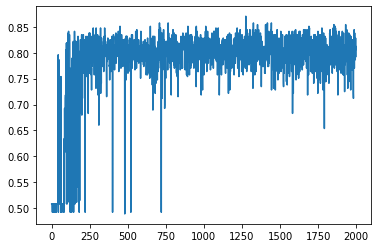

In [10]:
best_score_hidden_index = numpy.argmax(scores_hidden)
best_score_hidden = scores_hidden[best_score_hidden_index]
best_hidden = layers[best_score_hidden_index]

print('best_score_hidden =', best_score_hidden)
print('best_score_hidden_index =',best_score_hidden_index)
print('best_hidden_layer =',best_hidden)

best_score_hidden_indeces = numpy.where(scores_hidden == best_score_hidden)
print('best_score_hidden_indeces =', best_score_hidden_indeces)
for i in best_score_hidden_indeces[0]:
  print('best_hidden_layers =', layers[i])

layer_index = range(number_of_layers*number_of_nodes_per_layers)
matplotlib.pyplot.plot(layer_index,scores_hidden)
#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('hidden_layers_score.png')